## Import Dependecies

In [12]:
import numpy as np  # Importing the NumPy library for numerical operations on arrays
import matplotlib.pyplot as plt  # Importing the Matplotlib library for creating visualizations, such as plots
import cv2  # Importing the OpenCV library for computer vision tasks, image processing, and computer graphics
import os  # Importing the OS module to interact with the operating system, useful for file and directory operations
import IPython.display as ipd  # Importing the IPython display module for interactive and multimedia display in the IPython environment
import subprocess  # Importing the subprocess module to spawn new processes, useful for running external commands

* **Knowing about the list of files in this Directory**

In [14]:
# Using subprocess.run to execute the "dir" command in the Windows command prompt ("cmd") with "/c" to run the command and then terminate
result = subprocess.run(["cmd", "/c", "dir"], stdout=subprocess.PIPE, text=True) # Replace dir to your specific Directory]

# Printing the standard output (stdout) of the executed command
print(result.stdout)

 Volume in drive D is Sp@rkyOPu
 Volume Serial Number is 2840-C7A5

 Directory of D:\TF_GPU\Anantadi_Assignment

01/08/2024  09:54 AM    <DIR>          .
01/05/2024  11:39 PM    <DIR>          ..
01/07/2024  05:39 PM    <DIR>          .ipynb_checkpoints
01/05/2024  11:39 PM            25,842 Advertisement Image.jpg
01/05/2024  11:39 PM            50,650 AI_ML Assignment_ Anantadi.pdf
01/08/2024  09:54 AM           197,675 Image_Overlay_Video.ipynb
01/05/2024  11:40 PM        35,993,057 Input Video 2.mp4
01/08/2024  03:55 AM        52,265,298 output_video.mp4
01/05/2024  01:29 PM         6,830,486 Sample Video.mp4
01/07/2024  05:38 PM        11,729,374 Video_processing.ipynb
               7 File(s)    107,092,382 bytes
               3 Dir(s)  69,113,462,784 bytes free



### Input Video

In [17]:
# Path to the input video file
input_vdo_path = "Input Video 2.mp4"   # Rplace with your Input Video directory path

# # Display the title using Markdown
# ipd.display(ipd.Markdown("## Input Video"))
# ipd.display(ipd.Video(input_vdo_path, width= 720, embed=True))

# Displaying the input video details using Markdown
ipd.display(ipd.Markdown("* **Input Video Details:**"))

input_cap = cv2.VideoCapture(input_vdo_path)  # Opening the input video file for capturing video details

# Getting various properties of the input video
inp_frames = input_cap.get(cv2.CAP_PROP_FRAME_COUNT)
inp_height = input_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
inp_width = input_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
inp_fps = input_cap.get(cv2.CAP_PROP_FPS)

# Printing the captured video details
print(f"Total No of Frames: {inp_frames}\nFrame Rate: {inp_fps} frames/second\nFrame Width: {inp_width}\nFrame Height: {inp_height}")

# Releasing the video capture object
input_cap.release()

* **Input Video Details:**

Total No of Frames: 702.0
Frame Rate: 25.0 frames/second
Frame Width: 4096.0
Frame Height: 2160.0


### Sample Video

In [16]:
# Path to the sample video file
sample_vdo_path = "Sample Video.mp4"   # Rplace with your Sample Video directory path

# # Display the title using Markdown
# ipd.display(ipd.Markdown("## Sample Video"))
# ipd.display(ipd.Video(sample_vdo_path, width= 720, embed=True))

# Displaying the sample video details using Markdown
ipd.display(ipd.Markdown("* **Sample Video Details:**"))

sample_cap = cv2.VideoCapture(sample_vdo_path)  # Opening the sample video file for capturing video details

# Getting various properties of the sample video
smp_frames = sample_cap.get(cv2.CAP_PROP_FRAME_COUNT)
smp_height = sample_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
smp_width = sample_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
smp_fps = sample_cap.get(cv2.CAP_PROP_FPS)

# Printing the captured sample video details
print(f"Total No of Frames: {smp_frames}\nFrame Rate: {smp_fps} frames/second\nFrame Width: {smp_width}\nFrame Height: {smp_height}")

# Releasing the video capture object for the sample video
sample_cap.release()

* **Sample Video Details:**

Total No of Frames: 480.0
Frame Rate: 30.0 frames/second
Frame Width: 1920.0
Frame Height: 1080.0


### Advertisment Image

## Advertising Logo Image

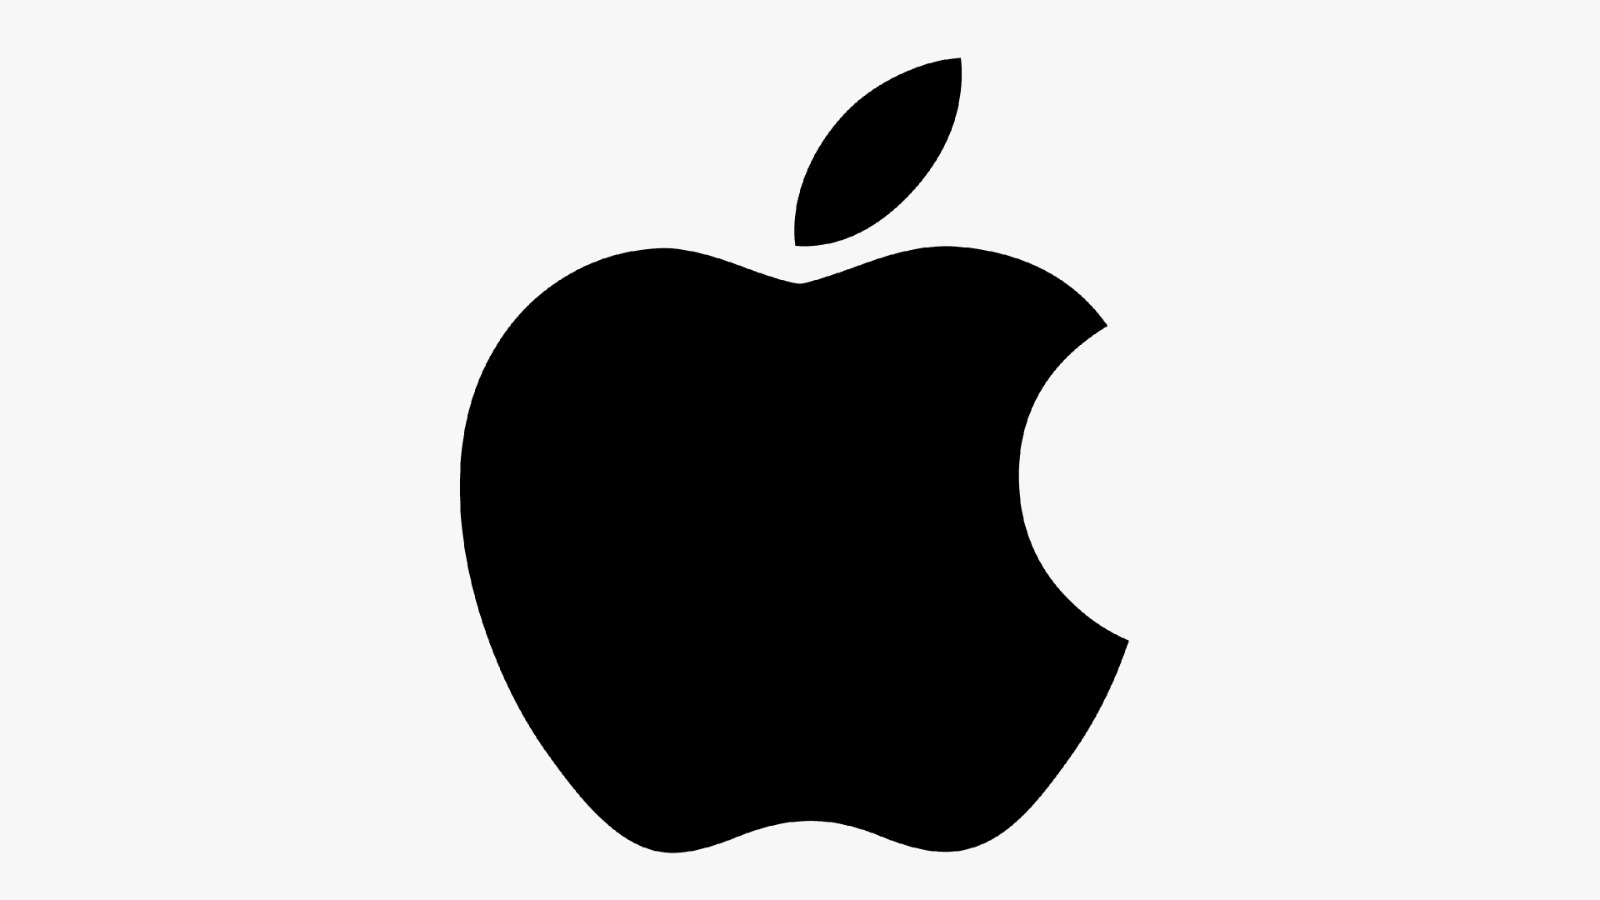

* **Advertising Image Details:**

Width: 1600
Height: 900


In [18]:
# Path to the advertisement image file
ad_image_path = "Advertisement Image.jpg"

# Displaying the title for the advertising logo image using Markdown
ipd.display(ipd.Markdown("## Advertising Logo Image"))
ipd.display(ipd.Image(filename=ad_image_path, format='jpg', embed=True, width=480))

ad_image = cv2.imread(ad_image_path)  # Reading the advertisement image using OpenCV
img_height, img_width, chs = ad_image.shape  # Retrieving the dimensions of the advertisement image

# Displaying the details of the ad image using Markdown
ipd.display(ipd.Markdown("* **Advertising Image Details:**"))
print(f"Width: {img_width}\nHeight: {img_height}")

### Background Removing Function:

In [19]:
def background_remove(image_path):
    """  
    Parameters:
        image_path (str): The path to the input JPEG image.
    
    Returns:
        png_image (numpy.ndarray): An image with transparency (PNG format).
    """

    # Load JPEG image
    jpeg_image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if jpeg_image is None:
        print("Error: Unable to load the image.")
        exit()
    
    # Convert white background to transparency
    gray_image = cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2GRAY)  # Convert the loaded JPEG image to grayscale
    _, mask = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY_INV)   # Apply a binary threshold to create a mask, making white background transparent
    
    png_image = cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2BGRA)  # Convert the original BGR image to BGRA (with alpha channel for transparency)
    png_image[:, :, 3] = mask  # Set the alpha channel of the BGRA image using the generated mask

    # Display the original and transparency images
    ipd.display(ipd.Markdown("## Original Image"))
    ipd.display(ipd.Image(filename=image_path, format='jpg', embed=True, width=480))
    ipd.display(ipd.Markdown("## Image of Logo with Transparency"))
    ipd.display(ipd.Image(data=cv2.imencode('.png', png_image)[1].tobytes(), format='png', embed=True, width=480))

    return png_image

### Finding the Region of Interest in a Frame : To extract Logo

In [20]:
# Function to automatically find the region of interest (ROI) in a frame
def find_roi(frame):
    """
    Parameters:
        frame (numpy.ndarray): Input frame (BGR format).

    Returns:
        tuple or None: Coordinates (x, y, width, height) of the detected ROI if found, otherwise None.
    """
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_frame, 50, 150)

    # Find contours in the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Select the largest contour (assuming it represenats the object)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)   # Identify the bounding rectangle of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Print and return the coordinates of the detected ROI
        print(f"The Detected Logo's ROI Coordinates: (x={x}, y={y}, width={w}, height={h})")
        return x, y, w, h
    else:
        # If no contours are found, return None
        return None

### Occlusion Handling while placing the Image as an overlay on a Videdo

In [21]:
# Occlusion Handling Strategy
def handle_occlusion(frame, occlusion_roi, advertisement_img):
    
    """
    Handles occlusion in a given frame by blending an advertisement image with the occluded region.

    Parameters:
        frame (numpy.ndarray): Input frame (BGR format).
        occlusion_roi (tuple): Coordinates (x, y, width, height) of the occluded region.
        advertisement_img (numpy.ndarray): Advertisement image with transparency (BGRA format).

    Returns:
        numpy.ndarray: Frame with occlusion handling applied.
    """

    # Get the dimensions of the advertisement image
    img_height, img_width, img_channels = advertisement_img.shape

    # Define the height and width for occlusion handling
    height = int(img_height * 0.8)
    width = int(img_width * 0.7)
    
    # Extract the region of interest for occlusion handling
    roi = frame[occlusion_roi[1]:occlusion_roi[1] + height, occlusion_roi[0]:occlusion_roi[0] + width]

    # Check if dimensions are non-zero
    if img_width > 0 and img_height > 0:
        # Resize the transparent advertisement image to match the dimensions of the region of interest
        resized_advertisement = cv2.resize(advertisement_img, (width, height), interpolation=cv2.INTER_NEAREST)
        alpha_channel = cv2.resize(advertisement_img[:, :, 3], (width, height), interpolation=cv2.INTER_NEAREST) / 255.0
    else:
        print("Error: Invalid dimensions in occlusion_roi:", occlusion_roi)
        return frame

    # Blend the images using alpha blending
    blended_roi = (1.0 - alpha_channel[:, :, np.newaxis]) * roi.astype(float) + alpha_channel[:, :, np.newaxis] * resized_advertisement[:, :, :3].astype(float)

    # Convert the result back to uint8
    blended_roi = blended_roi.astype(np.uint8)

    # Replace the region with the blended image
    frame[occlusion_roi[1]:occlusion_roi[1] + height, occlusion_roi[0]:occlusion_roi[0] + width] = blended_roi

    return frame

### Flowchart of the Below Code:

1. **Load JPEG image for background removal**
2. **Load input video ("Input Video 2.mp4")**
3. **Load a sample frame from "Sample Video.mp4"**
4. **Find the region of interest (ROI) in the sample frame**
5. **Calculate scaling factors for resolution difference**
6. **Apply scaling factors to obtain the occlusion ROI for advertisement placement**
7. **Create an output video file ("output_video.mp4") with specified codec and frame size**
8. **Loop through each frame of the input video**
    - a. Read a frame from the input video
    - b. Handle occlusion and insert transparent advertisement using the identified ROI
    - c. Write the modified frame to the output video
    - d. Repeat until all frames are processed
9. **Release resources (close video capture and wrier objects)**
er objects)**
er objects)


## Original Image

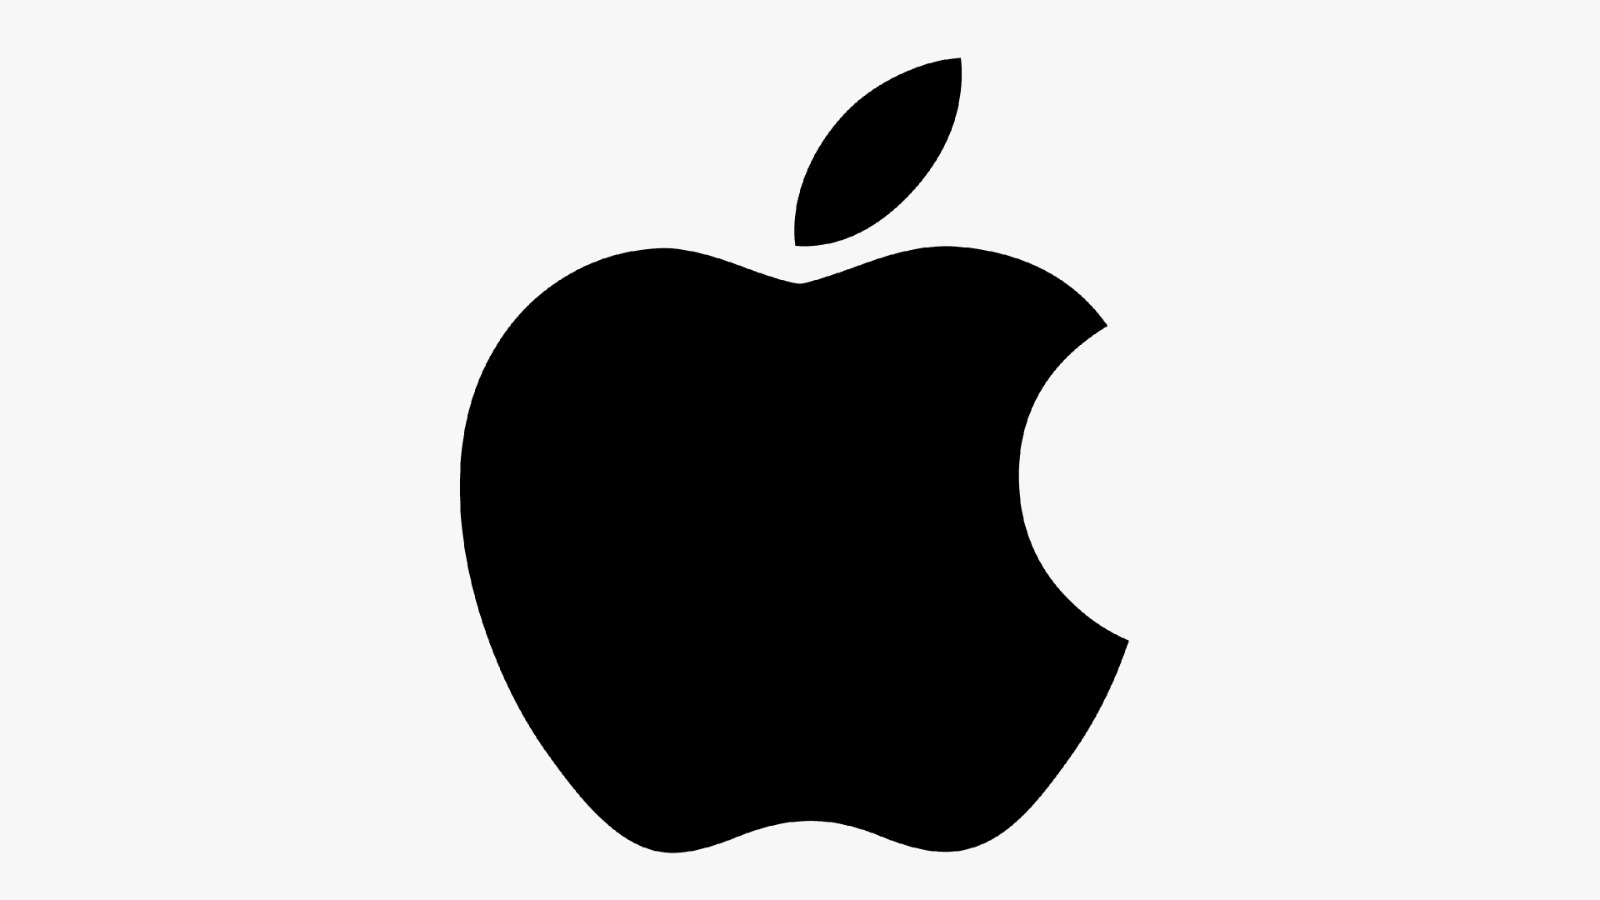

## Image of Logo with Transparency

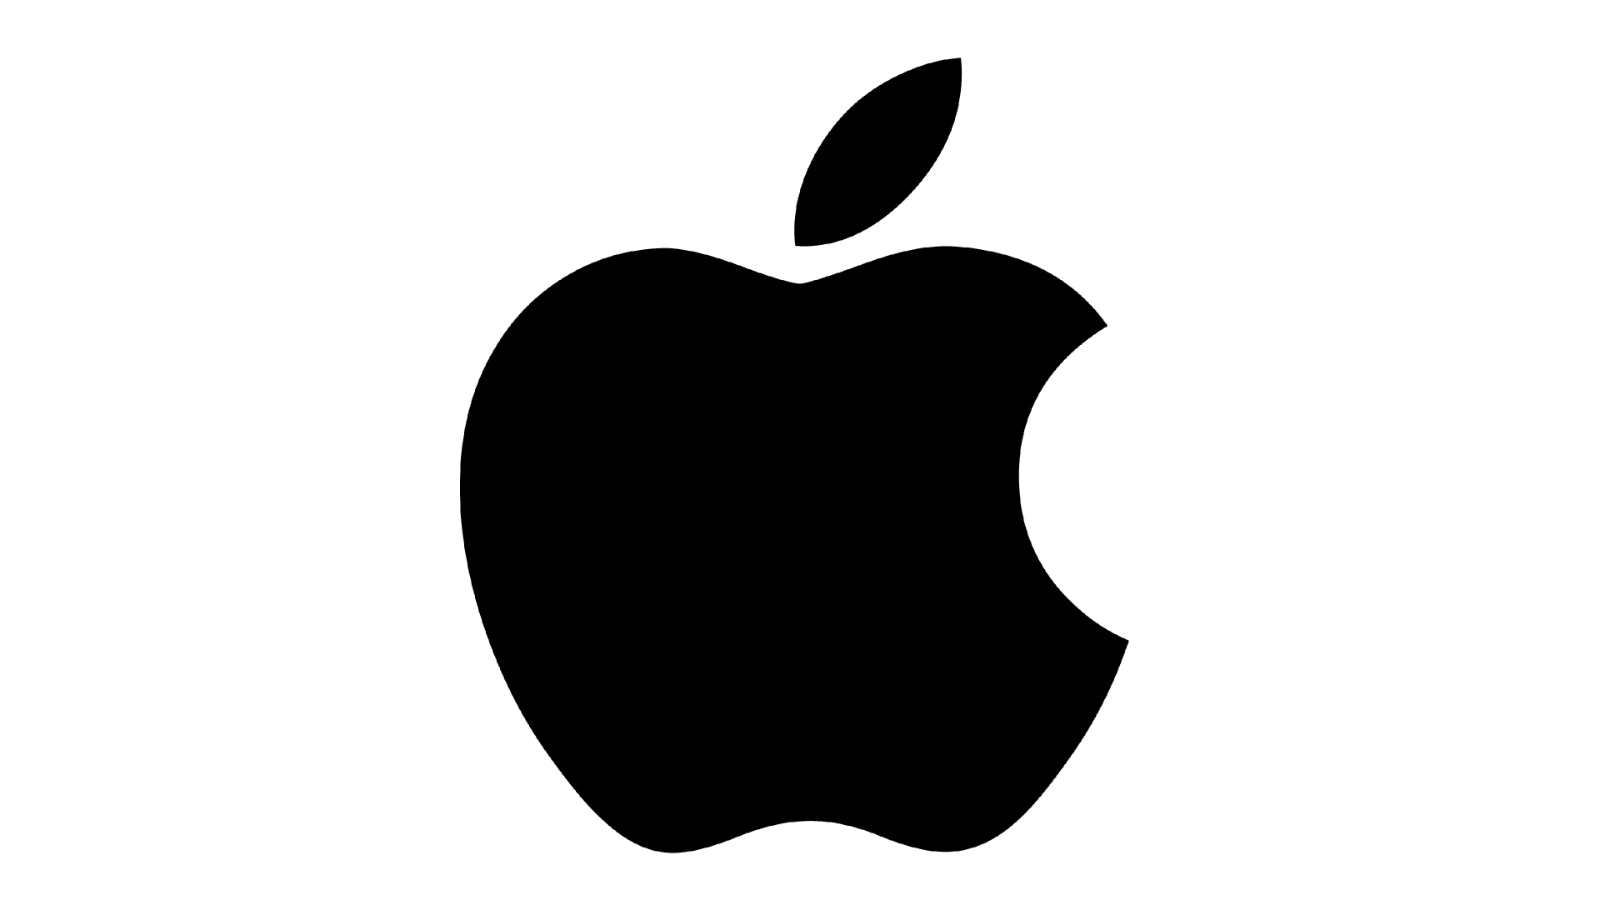

The Detected Logo's ROI Coordinates: (x=75, y=168, width=298, height=270)
Scaling Factors: X_factor=0.46875, Y_factor=0.5
Calculated ROI Coordinates to Place the Logo: (35, 84, 139, 135)


In [22]:
# Load JPEG image for background removal
image_path = "Advertisement Image.jpg"
jpeg_image = cv2.imread(image_path)
png_image = background_remove(image_path)

# Step 2: Load Input Video
inp_video_path = "Input Video 2.mp4"
inp_cap = cv2.VideoCapture(inp_video_path)

# Step 3: Find ROI automatically from the sample video
sample_video_path = "Sample Video.mp4"
sample_cap = cv2.VideoCapture(sample_video_path)
_, sample_frame = sample_cap.read()

# Find the ROI in the sample frame
occlusion_roi_sample = find_roi(sample_frame)

# Step 4: Calculate scaling factors for resolution difference
scale_x = sample_cap.get(cv2.CAP_PROP_FRAME_WIDTH) / inp_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
scale_y = sample_cap.get(cv2.CAP_PROP_FRAME_HEIGHT) / inp_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

# Apply scaling factors to occlusion_roi_sample
occlusion_roi = (
    int(occlusion_roi_sample[0] * scale_x),
    int(occlusion_roi_sample[1] * scale_y),
    int(occlusion_roi_sample[2] * scale_x),
    int(occlusion_roi_sample[3] * scale_y)
)

print(f"Scaling Factors: X_factor={scale_x}, Y_factor={scale_y}")
print("Calculated ROI Coordinates to Place the Logo:", occlusion_roi)

# Step 6: Advertisement Insertion
output_video_path = "output_video.mp4"  # Provide a proper output file path
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Change the codec to XVID
out = cv2.VideoWriter(output_video_path, fourcc, inp_fps, (int(inp_width), int(inp_height)))

while True:
    ret, frame = inp_cap.read()
    if not ret:
        break

    # Step 7: Handle Occlusion and Insert Transparent Advertisement
    frame = handle_occlusion(frame, occlusion_roi, png_image)

    out.write(frame)

# Step 8: Release Resources
inp_cap.release()
sample_cap.release()
out.release()


In [23]:
# Using subprocess.run to execute the "dir" command in the Windows command prompt ("cmd") with "/c" to run the command and then terminate
result = subprocess.run(["cmd", "/c", "dir"], stdout=subprocess.PIPE, text=True) # Replace dir to your specific Directory]

# Printing the standard output (stdout) of the executed command
print(result.stdout)

 Volume in drive D is Sp@rkyOPu
 Volume Serial Number is 2840-C7A5

 Directory of D:\TF_GPU\Anantadi_Assignment

01/08/2024  10:28 AM    <DIR>          .
01/05/2024  11:39 PM    <DIR>          ..
01/07/2024  05:39 PM    <DIR>          .ipynb_checkpoints
01/05/2024  11:39 PM            25,842 Advertisement Image.jpg
01/05/2024  11:39 PM            50,650 AI_ML Assignment_ Anantadi.pdf
01/08/2024  10:28 AM           203,598 Image_Overlay_Video.ipynb
01/05/2024  11:40 PM        35,993,057 Input Video 2.mp4
01/08/2024  10:27 AM        52,166,769 output_video.mp4
01/05/2024  01:29 PM         6,830,486 Sample Video.mp4
01/07/2024  05:38 PM        11,729,374 Video_processing.ipynb
               7 File(s)    106,999,776 bytes
               3 Dir(s)  69,113,556,992 bytes free



### Output Video

In [24]:
# Output video file path
output_vdo_path = "output_video.mp4"

# Displaying the title for the output video details using Markdown (commented out)
# ipd.display(ipd.Markdown("## Output Video"))
# ipd.display(ipd.Video(output_vdo_path, width=720, embed=True))

# Displaying the output video details using Markdown
ipd.display(ipd.Markdown("* **Output Video Details:**"))

# Opening the output video file for capturing video details
output_cap = cv2.VideoCapture(output_vdo_path)

# Getting various properties of the output video
otp_frames = output_cap.get(cv2.CAP_PROP_FRAME_COUNT)
otp_height = output_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
otp_width = output_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
otp_fps = output_cap.get(cv2.CAP_PROP_FPS)

# Printing the captured output video details
print(f"Total No of Frames: {otp_frames}\nFrame Rate: {otp_fps} frames/second\nFrame Width: {otp_width}\nFrame Height: {otp_height}")

# Releasing the video capture object for the output video
output_cap.release()

* **Output Video Details:**

Total No of Frames: 702.0
Frame Rate: 25.0 frames/second
Frame Width: 4096.0
Frame Height: 2160.0
